### Importing the Required Libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

### Loading the Dataset 

In [17]:
file_path = 'Downloads/AirQualityUCI.csv'
data = pd.read_csv(file_path, sep=';', decimal=',')

### Exploratory Data Analysis

This step is crucial for understanding the dataset's structure and quality. It provides insights into the data types, summary statistics, and the presence of any missing values.

In [18]:
# Basic Information
print("Basic Information:")
print(data.info())

# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())

# Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory 

### Data Cleaning and Preparation

In this step we clean and prepare the data by removing irrelevant columns and handling missing values. Additionally, it converts date and time columns to the correct formats and imputes missing values 

In [19]:
# Drop unnamed columns and rows with missing target values
data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)
data = data.dropna(subset=['C6H6(GT)'])

# Handle Date and Time columns
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S').dt.time

# Remove Date and Time for correlation
data_no_date = data.drop(columns=['Date', 'Time'])

# Data Cleaning
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_no_date), columns=data_no_date.columns)

### Outlier Handling

In [20]:
# Calculating the Z-scores of the dataset
z_scores = np.abs(stats.zscore(data_imputed))
data_no_outliers = data_imputed[(z_scores < 3).all(axis=1)]

### Feature Scaling

In [21]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_no_outliers), columns=data_no_outliers.columns)

### Saving the Cleaned Data

In [22]:
# Define the path to save the cleaned data
cleaned_file_path = 'Downloads/AirQualityUCI_Cleaned.csv'

# Save the cleaned data to a CSV file
scaled_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to Downloads/AirQualityUCI_Cleaned.csv


### Exploratory Data Analysis (EDA)

This step performs comprehensive exploratory data analysis (EDA) to understand the dataset's characteristics and relationships. It includes basic data information, statistical summaries, missing value counts, and various visualizations to reveal data distributions, feature relationships, and correlations.

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8577 non-null   float64
 1   PT08.S1(CO)    8577 non-null   float64
 2   NMHC(GT)       8577 non-null   float64
 3   C6H6(GT)       8577 non-null   float64
 4   PT08.S2(NMHC)  8577 non-null   float64
 5   NOx(GT)        8577 non-null   float64
 6   PT08.S3(NOx)   8577 non-null   float64
 7   NO2(GT)        8577 non-null   float64
 8   PT08.S4(NO2)   8577 non-null   float64
 9   PT08.S5(O3)    8577 non-null   float64
 10  T              8577 non-null   float64
 11  RH             8577 non-null   float64
 12  AH             8577 non-null   float64
dtypes: float64(13)
memory usage: 871.2 KB
None

Statistical Summary:
             CO(GT)   PT08.S1(CO)      NMHC(GT)      C6H6(GT)  PT08.S2(NMHC)  \
count  8.577000e+03  8.577000e+03  8.577000e+03  8.577000e+03   

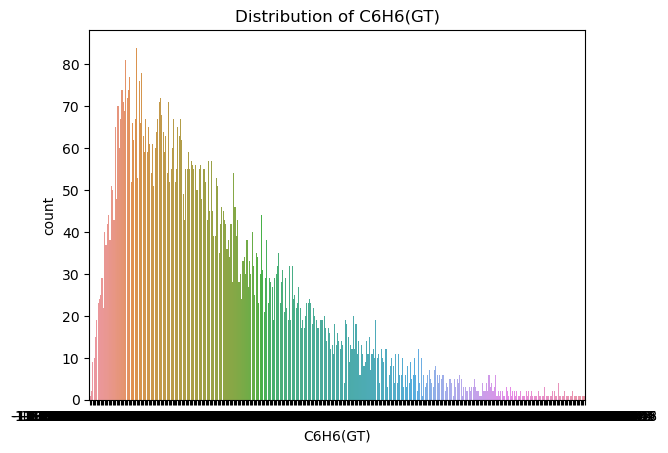

/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

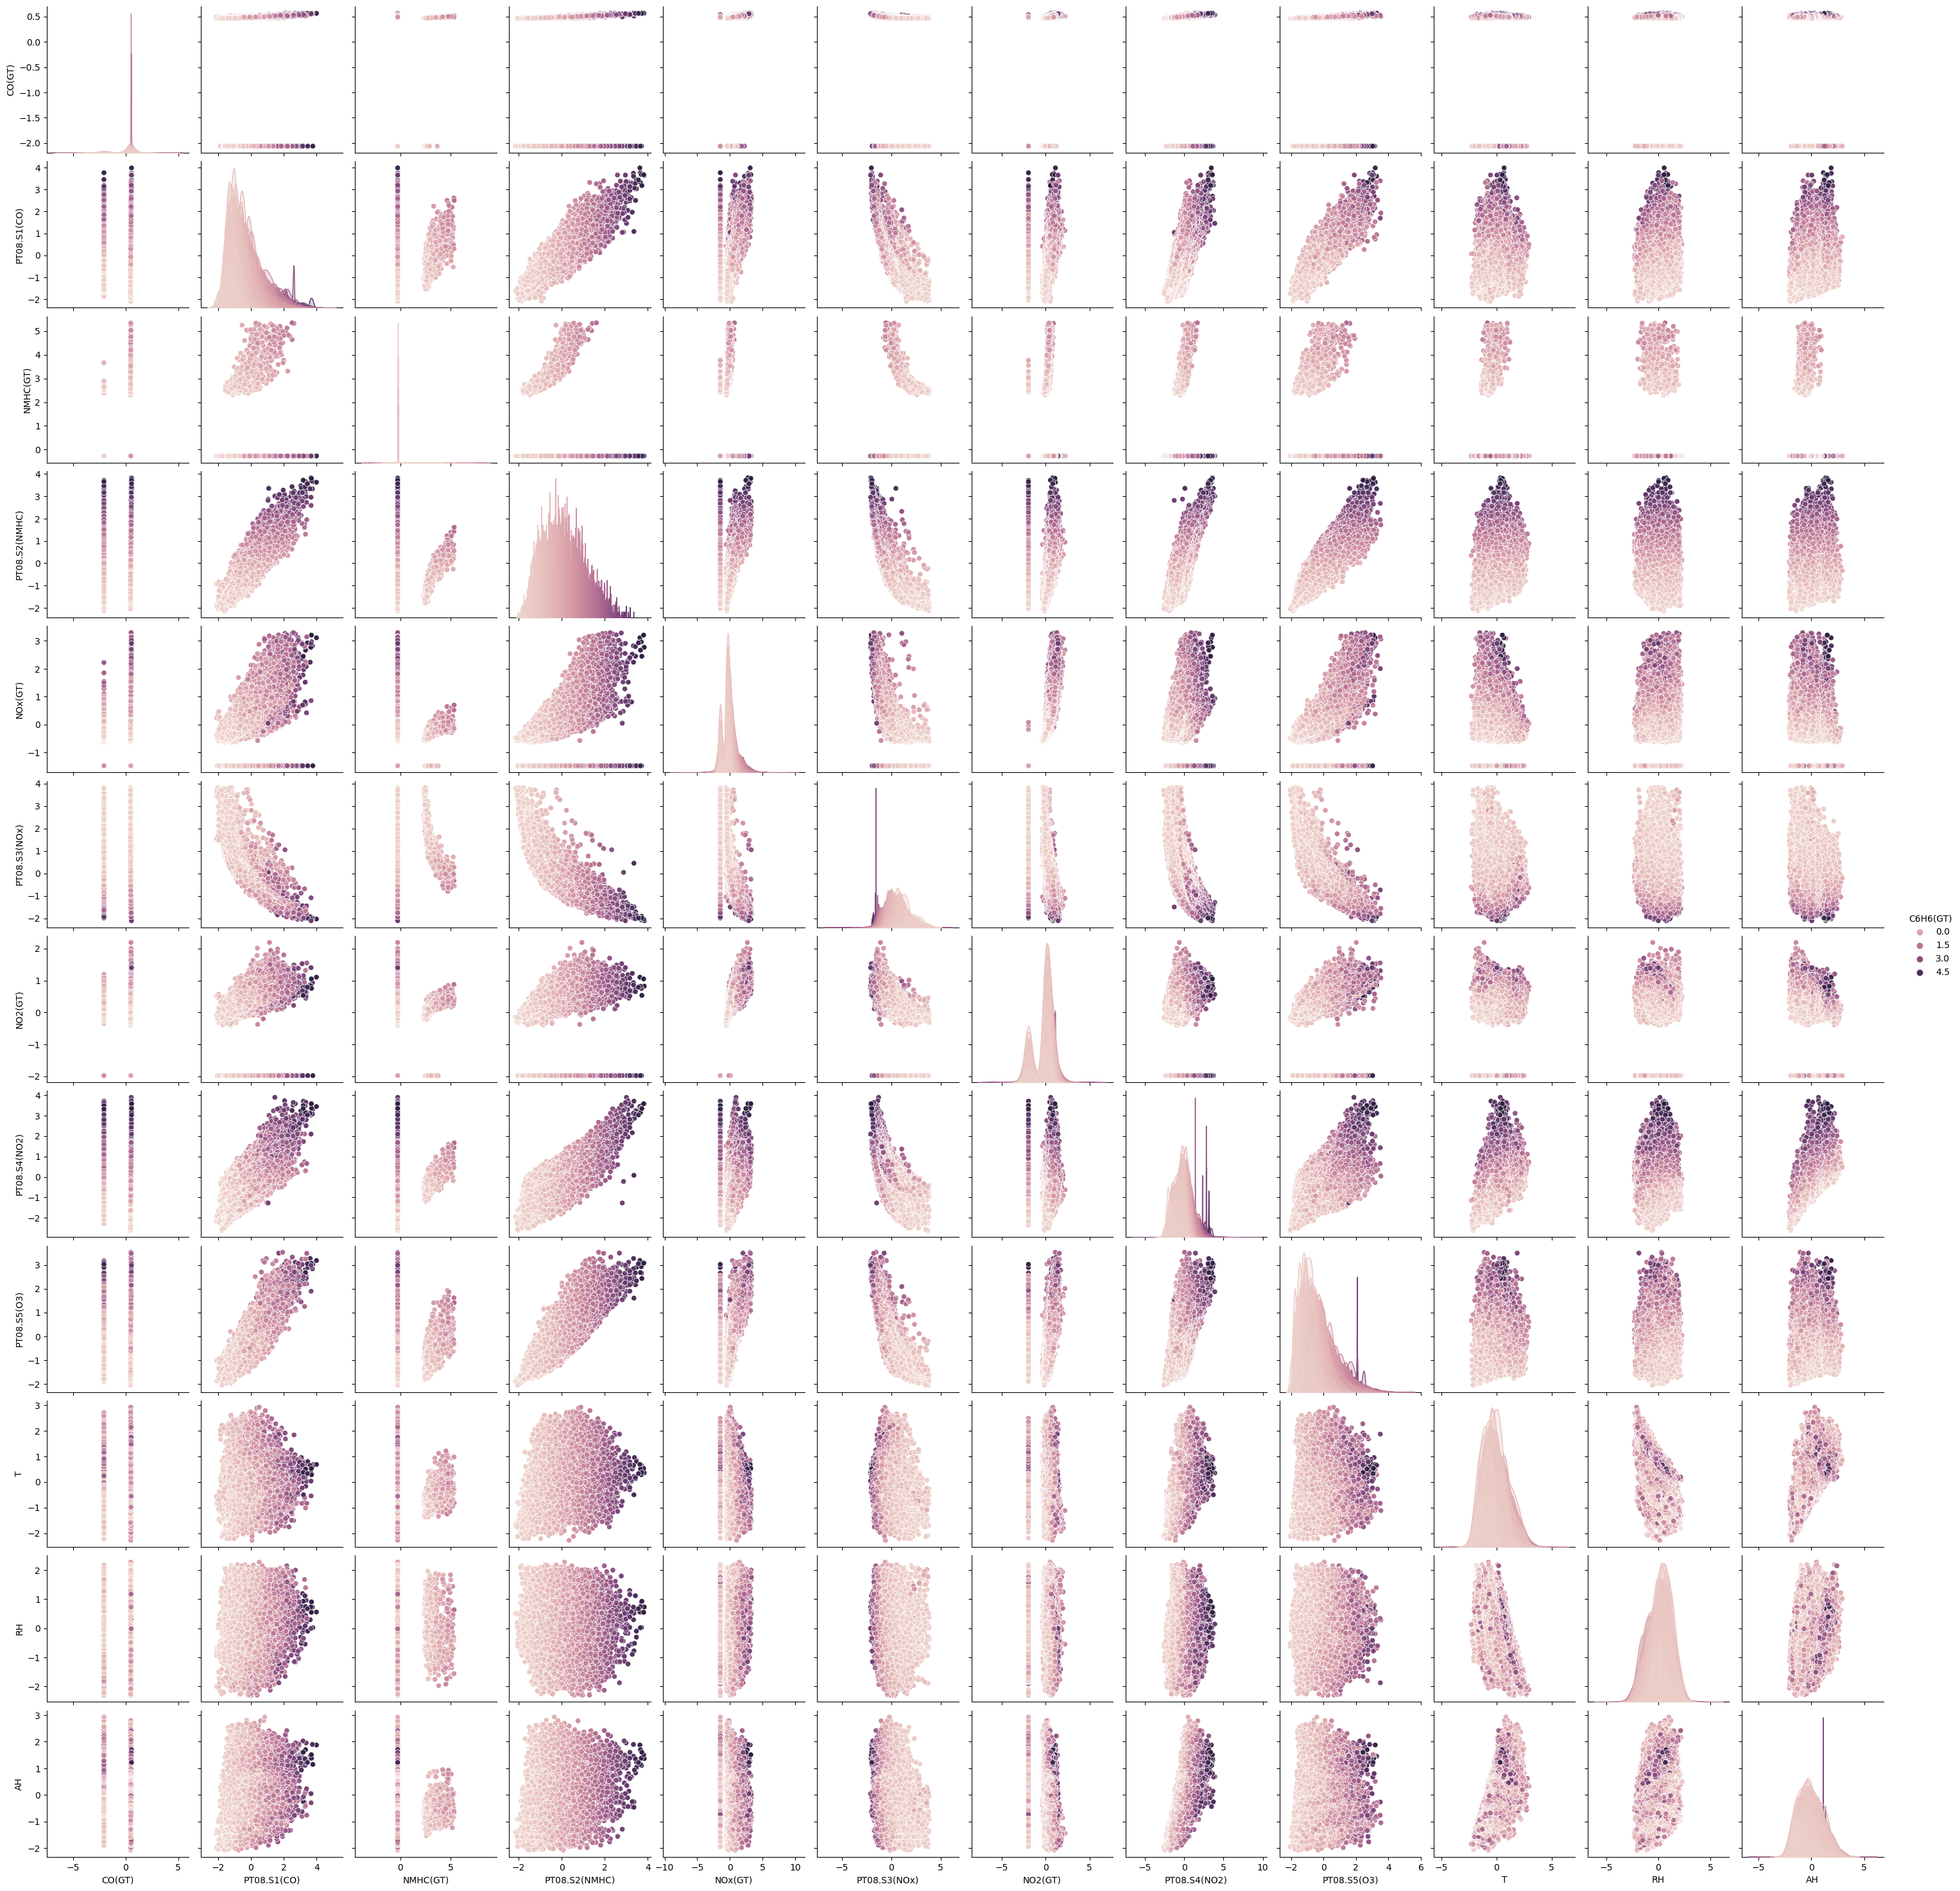

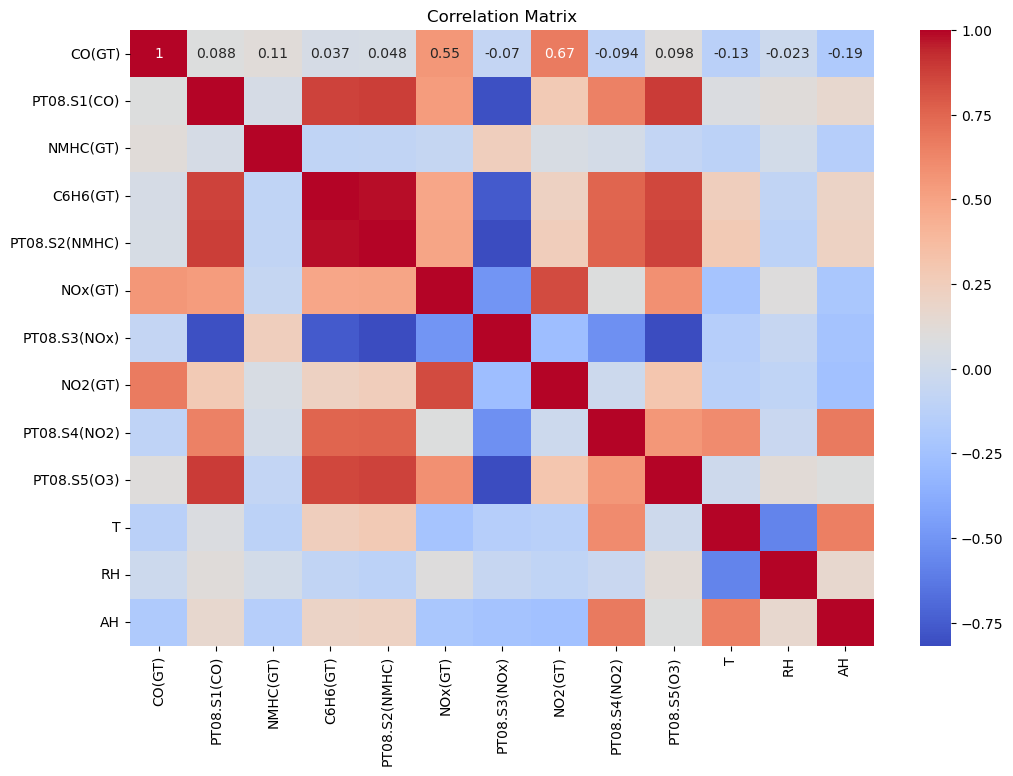

In [23]:
def data_exploration(data):
    print("Basic Information:")
    print(data.info())

    print("\nStatistical Summary:")
    print(data.describe())

    print("\nMissing Values:")
    print(data.isnull().sum())

    # Distribution of target variable
    sns.countplot(x='C6H6(GT)', data=data)
    plt.title('Distribution of C6H6(GT)')
    plt.show()

    # Pairplot to visualize relationships
    sns.pairplot(data.dropna(), hue='C6H6(GT)')
    plt.show()

    # Correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Perform EDA on the scaled data
data_exploration(scaled_data)